<a href="https://colab.research.google.com/github/prabur90/machinelearning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prabur90","key":"3dc4462a101e67bc5d4f65e8495c49c1"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d uciml/iris
!unzip iris.zip

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 6.10MB/s]
Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Accuracy: 0.9666666666666667

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



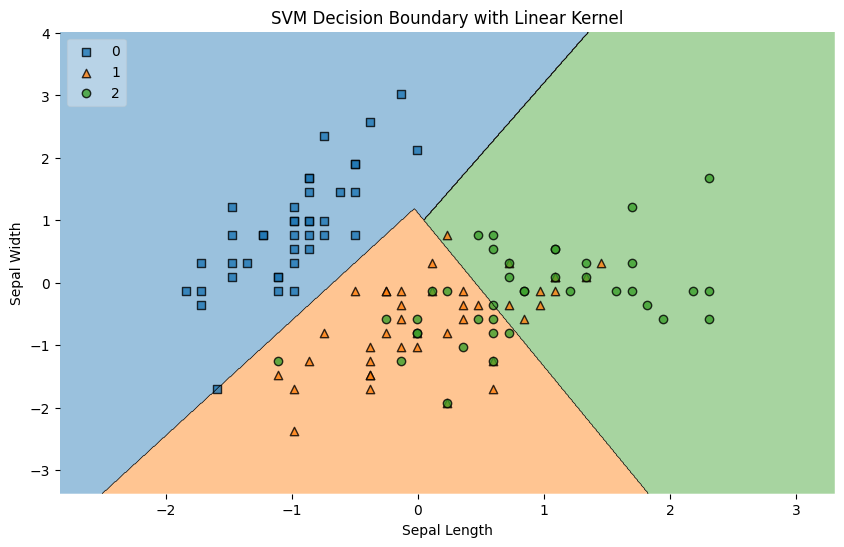

In [24]:
# Step 6: Load the dataset into a pandas DataFrame
import pandas as pd

df = pd.read_csv('Iris.csv')
print(df.head())

# Step 7: Preprocess the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dropping the Id column
df.drop('Id', axis=1, inplace=True)

# Splitting the data into features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Build and train the SVM model
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Step 9: Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Step 10: Plot decision boundary (optional and only for 2 features)
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# Use only the first two features for visualization
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, -1].values

# Encode the target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Re-split and re-standardize the data for visualization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model again for visualization
model.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=model, legend=2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.show()